In [ ]:
### install autogluon in google colab ###
### refer to https://qiita.com/daikikatsuragawa/items/319e09b5e1472ba4c4bb (20220825 accessed)
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet<2.0.0"
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 22.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

In [ ]:
#import libraries

# AutoGluon import
from autogluon.tabular import TabularDataset, TabularPredictor, FeatureMetadata

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csvファイルの読み込み
data_train_table = pd.read_csv('drive/My Drive/ML5G-PS-005_train.csv') #raw data
data_test_table = pd.read_csv('drive/My Drive/ML5G-PS-005_test.csv') #raw data

In [ ]:
data_train_failure = []
data_train_normal = []
for i in range(0,600):
  dt1_train = data_train_table['label'][70*i:70*(i+1)]
  if dt1_train[70*i] != 'normal':
    data_train_failure.append(i)
  else:
    data_train_normal.append(i)

In [ ]:
#train data + test data
fulldata = pd.concat([data_train_table, data_test_table])

In [ ]:
dt = fulldata.copy() #LSTMで用いるデータ
#delete time, label columns 
del dt['time']
del dt['label']

In [ ]:
dt_udm = dt.iloc[:, 2391:2477]

In [ ]:
feature_importance = ['amf.amf.app.cadvisor.container_memory_rss',
'ausf.ausf.app.cadvisor.container_memory_rss',
'igw.igw1.app.cadvisor.container_memory_rss',
'igw.igw2.app.cadvisor.container_memory_rss',
'nrf.nrf.app.cadvisor.container_memory_rss',
'smf.smf.app.cadvisor.container_memory_rss',
'udm.udm.app.cadvisor.container_memory_rss',
'upf.upf1.app.cadvisor.container_memory_rss',
'upf.upf2.app.cadvisor.container_memory_rss',
'upf.upf3.app.cadvisor.container_memory_rss']

In [ ]:
dt_importantcolumn = pd.DataFrame()
dt_importantcolumn = pd.concat([dt_importantcolumn, dt_udm])

for i_column in feature_importance:
  dt_importantcolumn[i_column] = dt[i_column][:]

In [ ]:
dt_importantcolumn.insert(0, 'amf.amf.app.five-g.RM.RegInitFail', dt['amf.amf.app.five-g.RM.RegInitFail'][:])

In [ ]:
#save
dt_importantcolumn.to_csv('drive/My Drive/4SA/dt_importantcolumn_feature_udm_rss_goodquality_1114.csv')

In [ ]:
#read
dt_importantcolumn = pd.read_csv('drive/My Drive/4SA/dt_importantcolumn_feature_udm_rss_goodquality_1114.csv')

In [ ]:
del dt_importantcolumn['Unnamed: 0']

In [ ]:
dt_importantcolumn

,amf.amf.app.five-g.RM.RegInitFail,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._0_1.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._1024_2047.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._128_255.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._131072_262143.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16384_32767.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16_31.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._2048_4095.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._256_511.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._262144_524287.count,...,amf.amf.app.cadvisor.container_memory_rss,ausf.ausf.app.cadvisor.container_memory_rss,igw.igw1.app.cadvisor.container_memory_rss,igw.igw2.app.cadvisor.container_memory_rss,nrf.nrf.app.cadvisor.container_memory_rss,smf.smf.app.cadvisor.container_memory_rss,udm.udm.app.cadvisor.container_memory_rss,upf.upf1.app.cadvisor.container_memory_rss,upf.upf2.app.cadvisor.container_memory_rss,upf.upf3.app.cadvisor.container_memory_rss
0,0,0,0,6,0,0,0,0,0,0,...,71307264,13336576,68317184,1196032,7614464,173801472,82411520,107098112,101605376,7434240
1,0,0,0,0,0,0,0,0,0,0,...,82931712,14823424,68317184,1015808,7614464,186101760,82616320,112640000,106741760,7266304
2,0,0,0,6,0,0,0,0,0,0,...,92434432,15904768,68317184,1150976,7614464,200777728,83582976,119111680,111878144,7208960
3,0,0,0,7,0,0,0,0,0,0,...,103264256,17526784,68452352,1003520,7749632,211046400,84791296,126275584,117690368,7614464
4,2,0,0,11,0,0,0,0,0,0,...,116330496,18202624,68722688,1003520,7884800,225206272,85819392,132222976,124313600,7884800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0,0,0,42,0,0,0,0,0,0,...,167563264,49004544,68902912,2019328,9027584,580710400,134938624,140005376,140025856,15253504
62996,0,0,0,58,0,0,0,0,0,0,...,167702528,49410048,68861952,2007040,9162752,581820416,135163904,139956224,140013568,15388672
62997,0,0,0,67,0,0,0,0,0,0,...,168235008,50356224,68861952,2142208,9162752,583090176,135704576,140091392,139866112,15523840
62998,0,0,0,63,0,0,0,0,0,0,...,168624128,50896896,68861952,1966080,9113600,584314880,136056832,140091392,140001280,15929344


In [ ]:
dt_train_importantcolumn = dt_importantcolumn[:len(data_train_table)][:]
dt_test_importantcolumn = dt_importantcolumn[len(data_train_table):][:]

In [ ]:
dt_train_importantcolumn

,amf.amf.app.five-g.RM.RegInitFail,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._0_1.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._1024_2047.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._128_255.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._131072_262143.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16384_32767.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16_31.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._2048_4095.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._256_511.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._262144_524287.count,...,amf.amf.app.cadvisor.container_memory_rss,ausf.ausf.app.cadvisor.container_memory_rss,igw.igw1.app.cadvisor.container_memory_rss,igw.igw2.app.cadvisor.container_memory_rss,nrf.nrf.app.cadvisor.container_memory_rss,smf.smf.app.cadvisor.container_memory_rss,udm.udm.app.cadvisor.container_memory_rss,upf.upf1.app.cadvisor.container_memory_rss,upf.upf2.app.cadvisor.container_memory_rss,upf.upf3.app.cadvisor.container_memory_rss
0,0,0,0,6,0,0,0,0,0,0,...,71307264,13336576,68317184,1196032,7614464,173801472,82411520,107098112,101605376,7434240
1,0,0,0,0,0,0,0,0,0,0,...,82931712,14823424,68317184,1015808,7614464,186101760,82616320,112640000,106741760,7266304
2,0,0,0,6,0,0,0,0,0,0,...,92434432,15904768,68317184,1150976,7614464,200777728,83582976,119111680,111878144,7208960
3,0,0,0,7,0,0,0,0,0,0,...,103264256,17526784,68452352,1003520,7749632,211046400,84791296,126275584,117690368,7614464
4,2,0,0,11,0,0,0,0,0,0,...,116330496,18202624,68722688,1003520,7884800,225206272,85819392,132222976,124313600,7884800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,166830080,48476160,69066752,3059712,9400320,579158016,132251648,139866112,140267520,14954496
41996,0,0,0,0,0,0,0,0,0,0,...,167481344,49152000,69201920,3194880,9400320,580431872,132943872,140001280,139968512,15089664
41997,0,0,0,0,0,0,0,0,0,0,...,167444480,49422336,69169152,3153920,9125888,581550080,133521408,140136448,140103680,15224832
41998,2,0,0,0,0,0,0,0,0,0,...,167997440,50098176,69169152,3112960,9261056,582361088,133984256,139952128,139771904,15343616


In [ ]:
data_train_normal_375 = data_train_normal[:375]
data_train_normal_75 = data_train_normal[375:]
data_train_failure_125 = data_train_failure[:125]
data_train_failure_25 = data_train_failure[125:]

In [ ]:
#separate train data(600 cycles) into 500 cycles and 100 cycles
data_train_500_table = dt_train_importantcolumn
data_train_100_table = pd.DataFrame()

for i_cycle in range(600):
  if i_cycle in data_train_normal_75 or i_cycle in data_train_failure_25:
    data_train_100_table = pd.concat([data_train_100_table, dt_train_importantcolumn.iloc[i_cycle*70:i_cycle*70+70, :]])
    data_train_500_table = data_train_500_table.drop(range(i_cycle*70, i_cycle*70+70))

In [ ]:
#save
data_train_500_table.to_csv('drive/My Drive/4SA/data_train_500_table_1114.csv')
data_train_100_table.to_csv('drive/My Drive/4SA/data_train_100_table_1114.csv')

In [ ]:
#read
data_train_500_table = pd.read_csv('drive/My Drive/4SA/data_train_500_table_1114.csv')
data_train_100_table = pd.read_csv('drive/My Drive/4SA/data_train_100_table_1114.csv')

In [ ]:
del data_train_500_table['Unnamed: 0']
del data_train_100_table['Unnamed: 0']

In [ ]:
data_train_500_table

,amf.amf.app.five-g.RM.RegInitFail,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._0_1.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._1024_2047.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._128_255.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._131072_262143.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16384_32767.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16_31.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._2048_4095.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._256_511.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._262144_524287.count,...,amf.amf.app.cadvisor.container_memory_rss,ausf.ausf.app.cadvisor.container_memory_rss,igw.igw1.app.cadvisor.container_memory_rss,igw.igw2.app.cadvisor.container_memory_rss,nrf.nrf.app.cadvisor.container_memory_rss,smf.smf.app.cadvisor.container_memory_rss,udm.udm.app.cadvisor.container_memory_rss,upf.upf1.app.cadvisor.container_memory_rss,upf.upf2.app.cadvisor.container_memory_rss,upf.upf3.app.cadvisor.container_memory_rss
0,0,0,0,6,0,0,0,0,0,0,...,71307264,13336576,68317184,1196032,7614464,173801472,82411520,107098112,101605376,7434240
1,0,0,0,0,0,0,0,0,0,0,...,82931712,14823424,68317184,1015808,7614464,186101760,82616320,112640000,106741760,7266304
2,0,0,0,6,0,0,0,0,0,0,...,92434432,15904768,68317184,1150976,7614464,200777728,83582976,119111680,111878144,7208960
3,0,0,0,7,0,0,0,0,0,0,...,103264256,17526784,68452352,1003520,7749632,211046400,84791296,126275584,117690368,7614464
4,2,0,0,11,0,0,0,0,0,0,...,116330496,18202624,68722688,1003520,7884800,225206272,85819392,132222976,124313600,7884800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,2,0,0,225,0,0,0,0,0,0,...,167346176,48947200,69754880,1646592,9428992,579317760,132796416,139886592,139612160,14561280
34996,0,0,0,219,0,0,0,0,0,0,...,167534592,49487872,69574656,1781760,9564160,580448256,133529600,139960320,139612160,14811136
34997,0,0,0,198,0,0,0,0,0,0,...,167936000,49893376,69558272,1622016,9351168,581427200,133816320,139808768,139747328,14946304
34998,2,0,0,174,0,0,0,0,0,0,...,168456192,50298880,69558272,1466368,9334784,582377472,134197248,139808768,140017664,15216640


In [ ]:
data_train_500_all = data_train_normal_375 + data_train_failure_125
data_train_500_all.sort()

In [ ]:
#training data
ind_train_60 = []
data_train_1to60_12_tab = pd.DataFrame()

for i_cycle in data_train_500_all:
  if i_cycle in data_train_failure_125:
    tmp = dt_train_importantcolumn.iloc[i_cycle*70+10:i_cycle*70+22, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])
    for i in range(12):
      ind_train_60.append(i_cycle*70+59)

  else: 
    tmp = dt_train_importantcolumn.iloc[i_cycle*70:i_cycle*70+1, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+5:i_cycle*70+6, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+10:i_cycle*70+11, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+15:i_cycle*70+16, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+20:i_cycle*70+21, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+25:i_cycle*70+26, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+30:i_cycle*70+31, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+35:i_cycle*70+36, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+40:i_cycle*70+41, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+45:i_cycle*70+46, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+50:i_cycle*70+51, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    tmp = dt_train_importantcolumn.iloc[i_cycle*70+55:i_cycle*70+56, :]
    data_train_1to60_12_tab = pd.concat([data_train_1to60_12_tab, tmp])

    for i in range(12):
      ind_train_60.append(i_cycle*70+59)

data_failure_60 = dt_train_importantcolumn.iloc[ind_train_60, :]['amf.amf.app.five-g.RM.RegInitFail']
data_train_12_mean_failure_60_tab=data_train_1to60_12_tab
data_train_12_mean_failure_60_tab['fail60']=data_failure_60.to_numpy()
data_train_12_mean_failure_60_noTimeLable_tab=data_train_12_mean_failure_60_tab.reset_index()

print(data_failure_60.shape)
data_train_12_mean_failure_60_noTimeLable_tab.head(6)

In [ ]:
del data_train_12_mean_failure_60_noTimeLable_tab['index'] #index

In [ ]:
#save
data_train_12_mean_failure_60_noTimeLable_tab.to_csv('drive/My Drive/4SA/data_train_12_mean_failure_60_noTimeLable_tab_1116.csv')

In [ ]:
#read
data_train_12_mean_failure_60_noTimeLable_tab = pd.read_csv('drive/My Drive/4SA/data_train_12_mean_failure_60_noTimeLable_tab_1116.csv')

In [ ]:
del data_train_12_mean_failure_60_noTimeLable_tab['Unnamed: 0']

In [ ]:
data_train_12_mean_failure_60_noTimeLable_tab

,amf.amf.app.five-g.RM.RegInitFail,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._0_1.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._1024_2047.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._128_255.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._131072_262143.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16384_32767.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16_31.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._2048_4095.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._256_511.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._262144_524287.count,...,ausf.ausf.app.cadvisor.container_memory_rss,igw.igw1.app.cadvisor.container_memory_rss,igw.igw2.app.cadvisor.container_memory_rss,nrf.nrf.app.cadvisor.container_memory_rss,smf.smf.app.cadvisor.container_memory_rss,udm.udm.app.cadvisor.container_memory_rss,upf.upf1.app.cadvisor.container_memory_rss,upf.upf2.app.cadvisor.container_memory_rss,upf.upf3.app.cadvisor.container_memory_rss,fail60
0,0,0,0,6,0,0,0,0,0,0,...,13336576,68317184,1196032,7614464,173801472,82411520,107098112,101605376,7434240,2
1,2,0,0,6,0,0,0,0,0,0,...,18743296,68722688,1138688,8019968,237559808,86495232,135737344,130125824,7856128,2
2,11,0,0,0,0,0,0,0,0,0,...,21581824,68534272,1499136,8282112,308535296,94117888,136359936,136208384,8744960,2
3,0,0,0,92,0,0,0,0,27,0,...,24690688,68886528,1904640,8552448,353214464,99614720,137306112,136884224,9404416,2
4,0,0,0,237,0,0,0,0,0,0,...,27529216,68767744,1945600,8466432,384557056,105320448,137920512,137097216,10215424,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,92,0,0,0,0,50,0,...,35086336,69890048,2465792,9404416,468680704,114753536,138657792,138817536,10985472,0
5996,6,0,0,168,0,0,0,0,0,0,...,37244928,69779456,2244608,9084928,497868800,118697984,138481664,139198464,11907072,0
5997,1,0,0,237,0,0,0,0,0,0,...,40218624,69537792,1818624,9302016,529235968,121798656,138887168,139550720,12218368,0
5998,0,0,0,156,0,0,0,0,0,0,...,43057152,69902336,1921024,9228288,560033792,124395520,139563008,139362304,12120064,0


In [ ]:
%%time
dir_base_name = "drive/My Drive/4SA/model/autogluon"
dir_default = f"{dir_base_name}_1121_train_normal_cycle_96columns_good_noindex_reg_cpu_4h"
data_input_tab = data_train_12_mean_failure_60_noTimeLable_tab


predictor = TabularPredictor(
    label='fail60', # ターゲット
    # label='amf.amf.app.five-g.RM.RegInitFail', # ターゲット
    problem_type='regression',
    path=dir_default, # モデルを保存するディレクトリ名
    verbosity=2,
    # eval_metric="f1" ## 評価指標 Defaults to ‘accuracy’ for binary and multiclass classification and ‘root_mean_squared_error’ for regression
#     eval_metric="roc_auc" # 評価指標
#     eval_metric="precision" # 評価指標
).fit(
    train_data=data_input_tab, # トレーニングデータ
    # presets="good_quality", ## default = [‘medium_quality_faster_train’]
    presets="good_quality",
#     presets="optimize_for_deployment",
#     presets=["good_quality","optimize_for_deployment"],
    # excluded_model_types = ['CAT'],
#     feature_metadata=feature_metadata,
    # ag_args_ensemble={"fold_fitting_strategy": "sequential_local"},
#    ag_args_fit={"num_gpus": 0},  # GPU の使用
     time_limit=14400 # [seconds]
#    time_limit=3600, # [seconds]
#     hyperparameters=hyperparameters
)

Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 14400s
AutoGluon will save models to "drive/My Drive/4SA/model/autogluon_1121_train_normal_cycle_96columns_good_noindex_reg_cpu_4h/"
AutoGluon Version:  0.6.0
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    6000
Train Data Columns: 97
Label Column: fail60
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10567.28 MB
	Train Data (Original)  Memory Usage: 4.66 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitti

CPU times: user 6min 54s, sys: 19.3 s, total: 7min 13s
Wall time: 3h 51min 15s


In [ ]:
# predictor のロード ディレクトリ名を指定する
predictor = TabularPredictor.load("drive/My Drive/4SA/model/autogluon_1121_train_normal_cycle_96columns_good_noindex_reg_cpu_4h",require_version_match=False)

In [ ]:
score = predictor.evaluate(data_train_12_mean_failure_60_noTimeLable_tab)
score

{'root_mean_squared_error': -3.95729598843459,
 'mean_squared_error': -15.660191540080497,
 'mean_absolute_error': -2.142862267403553,
 'r2': 0.958150030732145,
 'pearsonr': 0.9796800891872469,
 'median_absolute_error': -1.1433093547821045}

In [ ]:
predictor.leaderboard(
    data_train_12_mean_failure_60_noTimeLable_tab,
    silent=True
)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge_BAG_L1_FULL,-0.290251,NaN,0.645073,NaN,10.056112,0.645073,NaN,10.056112,1,True,29
1,CatBoost_BAG_L1_FULL,-1.742997,NaN,0.036355,NaN,35.237803,0.036355,NaN,35.237803,1,True,24
2,LightGBM_BAG_L1_FULL,-2.434276,NaN,0.128787,NaN,1.723840,0.128787,NaN,1.723840,1,True,22
3,XGBoost_BAG_L1_FULL,-2.444453,NaN,0.155378,NaN,6.466128,0.155378,NaN,6.466128,1,True,27
4,WeightedEnsemble_L2_FULL,-2.793877,NaN,1.354106,NaN,67.877726,0.006864,NaN,0.905243,2,True,30
5,RandomForestMSE_BAG_L1,-3.522425,-7.164919,0.387803,0.375399,43.736537,0.387803,0.375399,43.736537,1,True,3
6,RandomForestMSE_BAG_L1_FULL,-3.522425,NaN,0.401215,0.375399,43.736537,0.401215,0.375399,43.736537,1,True,23
7,NeuralNetFastAI_BAG_L2_FULL,-3.651378,NaN,2.652101,NaN,132.781240,0.193777,NaN,4.858632,2,True,36
8,LightGBMXT_BAG_L1_FULL,-3.660468,NaN,0.330357,NaN,2.877280,0.330357,NaN,2.877280,1,True,21
9,ExtraTreesMSE_BAG_L2_FULL,-3.685789,NaN,2.859013,NaN,135.920652,0.400690,0.401150,7.998044,2,True,35


In [ ]:
data_test_raw_tab = data_train_100_table

In [ ]:
data_test_raw_tab

,amf.amf.app.five-g.RM.RegInitFail,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._0_1.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._1024_2047.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._128_255.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._131072_262143.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16384_32767.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._16_31.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._2048_4095.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._256_511.count,udm.udm.infra.tcprtt._192.168.13.70_192.168.13.72.hist.bins._262144_524287.count,...,amf.amf.app.cadvisor.container_memory_rss,ausf.ausf.app.cadvisor.container_memory_rss,igw.igw1.app.cadvisor.container_memory_rss,igw.igw2.app.cadvisor.container_memory_rss,nrf.nrf.app.cadvisor.container_memory_rss,smf.smf.app.cadvisor.container_memory_rss,udm.udm.app.cadvisor.container_memory_rss,upf.upf1.app.cadvisor.container_memory_rss,upf.upf2.app.cadvisor.container_memory_rss,upf.upf3.app.cadvisor.container_memory_rss
0,0,0,0,10,0,0,0,0,0,0,...,57905152,11845632,68354048,1564672,8220672,156020736,80855040,97116160,92688384,7180288
1,0,0,0,16,0,0,0,0,0,0,...,70340608,13197312,68177920,1564672,8085504,168476672,82083840,104280064,99176448,7315456
2,0,0,0,6,0,0,0,0,0,0,...,82034688,14819328,68157440,1650688,8085504,180400128,83324928,111308800,106070016,7585792
3,0,0,0,0,0,0,0,0,0,0,...,91721728,15765504,68292608,1785856,8085504,196546560,84897792,118472704,111882240,7671808
4,0,0,0,9,0,0,0,0,0,0,...,103145472,17387520,68243456,1785856,8044544,210518016,85659648,126042112,118235136,7790592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,166830080,48476160,69066752,3059712,9400320,579158016,132251648,139866112,140267520,14954496
6996,0,0,0,0,0,0,0,0,0,0,...,167481344,49152000,69201920,3194880,9400320,580431872,132943872,140001280,139968512,15089664
6997,0,0,0,0,0,0,0,0,0,0,...,167444480,49422336,69169152,3153920,9125888,581550080,133521408,140136448,140103680,15224832
6998,2,0,0,0,0,0,0,0,0,0,...,167997440,50098176,69169152,3112960,9261056,582361088,133984256,139952128,139771904,15343616


In [ ]:
failure_60 = []

for i in range(100):
  failure_60.append(data_test_raw_tab.iloc[i*70+59:i*70+60, :]['amf.amf.app.five-g.RM.RegInitFail'])

In [ ]:
data_test_raw_tab.iloc[59:60, :]['amf.amf.app.five-g.RM.RegInitFail']

59    35
Name: amf.amf.app.five-g.RM.RegInitFail, dtype: int64

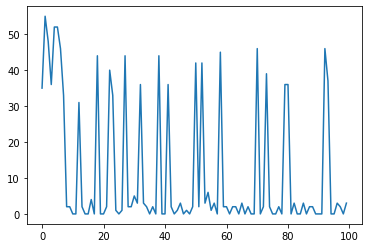

In [ ]:
plt.plot(failure_60)
plt.show()

In [ ]:
result_test = predictor.predict(data_test_raw_tab)
#result_test = predictor.predict(data_test_raw_tab, model='LightGBMLarge_BAG_L1_FULL')

In [ ]:
result_test

0       0.647647
1       0.719446
2       1.000473
3       2.553421
4       0.979263
          ...   
6995    1.404316
6996    1.000225
6997    0.821403
6998    1.671442
6999    1.936796
Name: fail60, Length: 7000, dtype: float32

In [ ]:
##validation 100

In [ ]:
#data_train_normal_75 = data_train_normal[375:]
#data_train_failure_25 

In [ ]:
data_train_100_table

In [ ]:
data_train_val100 = data_train_normal_75 + data_train_failure_25
data_train_val100.sort()

In [ ]:
data_train_val100

In [ ]:
cycleLable_val_arr = []
cycleLable_val_arr_normal = []
for i in range(0,100):
  if data_train_val100[i] in data_train_failure_25:
    cycleLable_val_arr.append(i)
  else:
    cycleLable_val_arr_normal.append(i)

In [ ]:
data_train_val_importantcolumn = pd.DataFrame()
data_train_val_importantcolumn = pd.concat([data_train_100_table, data_train_val_importantcolumn])

In [ ]:
dt_x = [i for i in range(7000)]
data_train_val_importantcolumn.insert(0, 'reset_index', dt_x)
data_train_val_importantcolumn = data_train_val_importantcolumn.set_index('reset_index')

In [ ]:
data_val_raw_tab = data_train_val_importantcolumn

In [ ]:
result_val = predictor.predict(data_val_raw_tab)

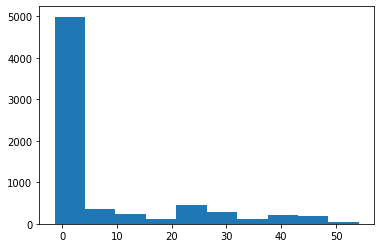

In [ ]:
plt.hist(result_val)
plt.show()

In [ ]:
val_overThres = [-1]*100
val_overThres_predict= [-1]*100

f1score_20to40 = []

for i_threshold in range(20, 41):
  val_overThres = [-1]*100
  val_overThres_predict= [-1]*100
  for i_cycle in range(100):
    for i_x in range(70):
      if result_val[i_cycle*70+i_x] >= i_threshold:
        if val_overThres[i_cycle] == -1:
          val_overThres[i_cycle] = i_x
          val_overThres_predict[i_cycle]=result_val[i_cycle*70+i_x]

  val_overThres_failure = []
  val_overThres_normal = []
  val_overThres_failure_predict = []
  val_overThres_normal_predict = []
  for i in range(100):
    if i in cycleLable_val_arr: #failure
      val_overThres_failure.append(val_overThres[i])
      val_overThres_failure_predict.append(val_overThres_predict[i])
    else:
      val_overThres_normal.append(val_overThres[i])
      val_overThres_normal_predict.append(val_overThres_predict[i])

  testy_overThres_f1 = [-1]*100
  testPredict_overThres_f1 = [-1]*100
  row_num = 59
  for i_cycle in range(100):
    if i_cycle in cycleLable_val_arr:
      testy_overThres_f1[i_cycle] = 0
    else:
      testy_overThres_f1[i_cycle] = 1

  for i in range(len(val_overThres_failure)):
    if val_overThres_failure[i] <= row_num and val_overThres_failure[i] != -1:
      testPredict_overThres_f1[cycleLable_val_arr[i]] = 0 #0
    else:
      testPredict_overThres_f1[cycleLable_val_arr[i]] = 1 #1

  for i in range(len(val_overThres_normal)):
    if val_overThres_normal[i] <= row_num and val_overThres_normal[i] != -1:
      testPredict_overThres_f1[cycleLable_val_arr_normal[i]] = 0
    else:
      testPredict_overThres_f1[cycleLable_val_arr_normal[i]] = 1
    

  print("f1-score: " + str(f1_score(testy_overThres_f1, testPredict_overThres_f1, average='macro')))
  f1score_20to40.append(f1_score(testy_overThres_f1, testPredict_overThres_f1, average='macro'))

  cm = confusion_matrix(testy_overThres_f1, testPredict_overThres_f1)
  print(cm)

f1-score: 0.7057587221521648
[[25  0]
 [28 47]]
f1-score: 0.7333333333333334
[[25  0]
 [25 50]]
f1-score: 0.7425997425997426
[[25  0]
 [24 51]]
f1-score: 0.7707173272191287
[[25  0]
 [21 54]]
f1-score: 0.7802197802197801
[[25  0]
 [20 55]]
f1-score: 0.7897997566102446
[[25  0]
 [19 56]]
f1-score: 0.7994652406417112
[[25  0]
 [18 57]]
f1-score: 0.7994652406417112
[[25  0]
 [18 57]]
f1-score: 0.8190863862505653
[[25  0]
 [16 59]]
f1-score: 0.8290598290598291
[[25  0]
 [15 60]]
f1-score: 0.8290598290598291
[[25  0]
 [15 60]]
f1-score: 0.8290598290598291
[[25  0]
 [15 60]]
f1-score: 0.8809523809523809
[[25  0]
 [10 65]]
f1-score: 0.8809523809523809
[[25  0]
 [10 65]]
f1-score: 0.9028654686741135
[[25  0]
 [ 8 67]]
f1-score: 0.9028654686741135
[[25  0]
 [ 8 67]]
f1-score: 0.9028654686741135
[[25  0]
 [ 8 67]]
f1-score: 0.9255952380952381
[[25  0]
 [ 6 69]]
f1-score: 0.9255952380952381
[[25  0]
 [ 6 69]]
f1-score: 0.9255952380952381
[[25  0]
 [ 6 69]]
f1-score: 0.9614940315748941
[[25  0]
 [

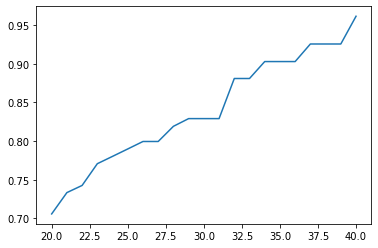

In [ ]:
from matplotlib.ticker import *

x = [i for i in range(20, 41)]
#f1score_20to40 = int(f1score_20to_40)
#new_f1score = [round(f1score_20to40[n], 2) for n in range(len(f1score_20to40))] 

#ax = plt.gca()
plt.plot(x, f1score_20to40)
#ax.yaxis.set_major_locator(MultipleLocator(1))
plt.show()

In [ ]:
#threshold with max f1score

val_overThres = [-1]*100
val_overThres_predict= [-1]*100

i_threshold = 40
val_overThres = [-1]*100
val_overThres_predict= [-1]*100
for i_cycle in range(100):
  for i_x in range(70):
    if result_val[i_cycle*70+i_x] >= i_threshold:
      if val_overThres[i_cycle] == -1:
        val_overThres[i_cycle] = i_x
        val_overThres_predict[i_cycle]=result_val[i_cycle*70+i_x]

val_overThres_failure = []
val_overThres_normal = []
val_overThres_failure_predict = []
val_overThres_normal_predict = []
for i in range(100):
  if i in cycleLable_val_arr: #failure
    val_overThres_failure.append(val_overThres[i])
    val_overThres_failure_predict.append(val_overThres_predict[i])
  else:
    val_overThres_normal.append(val_overThres[i])
    val_overThres_normal_predict.append(val_overThres_predict[i])

testy_overThres_f1 = [-1]*100
testPredict_overThres_f1 = [-1]*100
row_num = 59
for i_cycle in range(100):
  if i_cycle in cycleLable_val_arr:
    testy_overThres_f1[i_cycle] = 0
  else:
    testy_overThres_f1[i_cycle] = 1

for i in range(len(val_overThres_failure)):
  if val_overThres_failure[i] <= row_num and val_overThres_failure[i] != -1:
    testPredict_overThres_f1[cycleLable_val_arr[i]] = 0 #0
  else:
    testPredict_overThres_f1[cycleLable_val_arr[i]] = 1 #1

for i in range(len(val_overThres_normal)):
  if val_overThres_normal[i] <= row_num and val_overThres_normal[i] != -1:
    testPredict_overThres_f1[cycleLable_val_arr_normal[i]] = 0
  else:
    testPredict_overThres_f1[cycleLable_val_arr_normal[i]] = 1
    

print("f1-score: " + str(f1_score(testy_overThres_f1, testPredict_overThres_f1, average='macro')))
  
cm = confusion_matrix(testy_overThres_f1, testPredict_overThres_f1)
print(cm)

f1-score: 0.9614940315748941
[[25  0]
 [ 3 72]]


(array([1., 2., 0., 0., 0., 0., 1., 0., 1., 1., 3., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([40.115845, 40.313602, 40.51136 , 40.709118, 40.90687 , 41.10463 ,
        41.302387, 41.500145, 41.697903, 41.89566 , 42.09342 , 42.291172,
        42.48893 , 42.686687, 42.884445, 43.082203, 43.27996 , 43.47772 ,
        43.675472, 43.87323 , 44.070988, 44.268745, 44.466503, 44.66426 ,
        44.86202 , 45.059772, 45.25753 , 45.455288, 45.653046, 45.850803,
        46.04856 , 46.24632 , 46.444073, 46.64183 , 46.83959 , 47.037346,
        47.235104, 47.43286 , 47.63062 , 47.828373, 48.02613 , 48.22389 ,
        48.421646, 48.619404, 48.81716 , 49.01492 , 49.212673, 49.41043 ,
        49.60819 , 49.805946, 50.003704, 50.20146 , 50.39922 , 50.596973,
        50.7

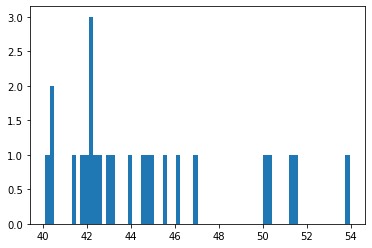

In [ ]:
plt.hist(val_overThres_failure_predict, bins=70)

(array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.]),
 array([-1.        , -0.32479717,  0.35040567,  1.0256085 ,  1.70081133,
         2.37601416,  3.051217  ,  3.72641983,  4.40162266,  5.0768255 ,
         5.75202833,  6.42723116,  7.10243399,  7.77763683,  8.45283966,
         9.12804249,  9.80324533, 10.47844816, 11.15365099, 11.82885383,
        12.50405666, 13.17925949, 13.85446232, 14.52966516, 15.20486799,
        15.88007082, 16.55527366, 17.23047649, 17.90567932, 18.58088215,
        19.25608499, 19.93128782, 20.60649065, 21.28169349, 21.95689632,
        22.63209915, 23.30730198, 23.98250482, 24.65770765, 25.33291048,
        26.00811

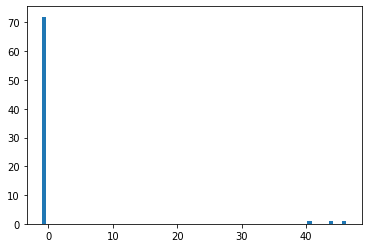

In [ ]:
plt.hist(val_overThres_normal_predict, bins=70)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([10.        , 10.11428571, 10.22857143, 10.34285714, 10.45714286,
        10.57142857, 10.68571429, 10.8       , 10.91428571, 11.02857143,
        11.14285714, 11.25714286, 11.37142857, 11.48571429, 11.6       ,
        11.71428571, 11.82857143, 11.94285714, 12.05714286, 12.17142857,
        12.28571429, 12.4       , 12.51428571, 12.62857143, 12.74285714,
        12.85714286, 12.97142857, 13.08571429, 13.2       , 13.31428571,
        13.42857143, 13.54285714, 13.65714286, 13.77142857, 13.88571429,
        14.        , 14.11428571, 14.22857143, 14.34285714, 14.45714286,
        14.57142

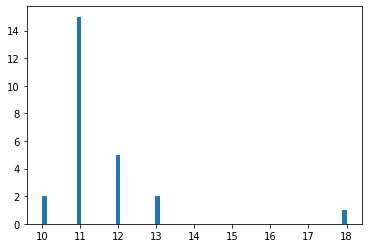

In [ ]:
plt.hist(val_overThres_failure, bins=70)

(array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
         0.42857143,  0.71428571,  1.        ,  1.28571429,  1.57142857,
         1.85714286,  2.14285714,  2.42857143,  2.71428571,  3.        ,
         3.28571429,  3.57142857,  3.85714286,  4.14285714,  4.42857143,
         4.71428571,  5.        ,  5.28571429,  5.57142857,  5.85714286,
         6.14285714,  6.42857143,  6.71428571,  7.        ,  7.28571429,
         7.57142857,  7.85714286,  8.14285714,  8.42857143,  8.71428571,
         9.        ,  9.28571429,  9.57142857,  9.85714286, 10.14285714,
        10.42857

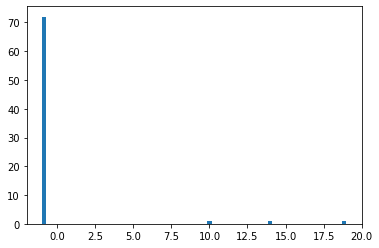

In [ ]:
plt.hist(val_overThres_normal, bins=70)

In [ ]:
###test data

In [ ]:
data_test_table = pd.read_csv('drive/My Drive/ML5G-PS-005_test.csv')

In [ ]:
cycleLable_test_arr = []
cycleLable_test_arr_normal = []
for i in range(0,300):
  dt1_test = data_test_table['label'][70*i:70*(i+1)]
  if dt1_test[70*i] != 'normal':
    cycleLable_test_arr.append(i)
  else:
    cycleLable_test_arr_normal.append(i)

In [ ]:
dt_test_importantcolumn_new = pd.DataFrame()
dt_test_importantcolumn_new = pd.concat([dt_test_importantcolumn, dt_test_importantcolumn_new])

In [ ]:
dt_x = [i for i in range(21000)]
dt_test_importantcolumn_new.insert(0, 'reset_index', dt_x)
dt_test_importantcolumn_new = dt_test_importantcolumn_new.set_index('reset_index')

In [ ]:
data_test_raw_tab = dt_test_importantcolumn_new

In [ ]:
result_test = predictor.predict(data_test_raw_tab)

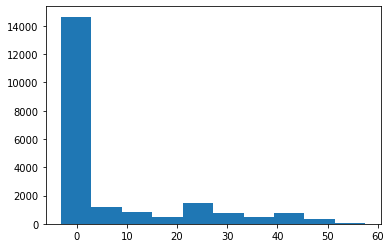

In [ ]:
plt.hist(result_test)
plt.show()

In [ ]:
### check when prediction value exceeded threshold
test_overThres = [-1]*300
test_overThres_predict= [-1]*300
threshold = 40

for i_cycle in range(300):
  for i_x in range(70):
    if result_test[i_cycle*70+i_x] >= threshold:
      if test_overThres[i_cycle] == -1:
        test_overThres[i_cycle] = i_x
        test_overThres_predict[i_cycle]=result_test[i_cycle*70+i_x]

In [ ]:
test_overThres_failure = []
test_overThres_normal = []
test_overThres_failure_predict = []
test_overThres_normal_predict = []

for i in range(300):
  if i in cycleLable_test_arr: #failure
    test_overThres_failure.append(test_overThres[i])
    test_overThres_failure_predict.append(test_overThres_predict[i])
  else:
    test_overThres_normal.append(test_overThres[i])
    test_overThres_normal_predict.append(test_overThres_predict[i])

(array([3., 0., 1., 2., 3., 0., 2., 1., 3., 1., 1., 0., 2., 1., 3., 1., 3.,
        2., 1., 0., 2., 1., 0., 4., 2., 3., 2., 0., 2., 2., 0., 0., 1., 2.,
        0., 3., 0., 1., 1., 0., 1., 1., 2., 0., 0., 3., 1., 1., 0., 0., 2.,
        1., 2., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([40.054775, 40.256603, 40.45843 , 40.66026 , 40.862087, 41.063915,
        41.265743, 41.46757 , 41.6694  , 41.87123 , 42.07306 , 42.274887,
        42.476715, 42.678543, 42.88037 , 43.0822  , 43.284027, 43.485855,
        43.687683, 43.88951 , 44.09134 , 44.293167, 44.494995, 44.696823,
        44.89865 , 45.10048 , 45.302307, 45.50414 , 45.705967, 45.907795,
        46.109623, 46.31145 , 46.51328 , 46.715107, 46.916935, 47.118763,
        47.32059 , 47.52242 , 47.724247, 47.926075, 48.127903, 48.32973 ,
        48.53156 , 48.733387, 48.93522 , 49.137047, 49.338875, 49.540703,
        49.74253 , 49.94436 , 50.146187, 50.348015, 50.549843, 50.75167 ,
        50.9

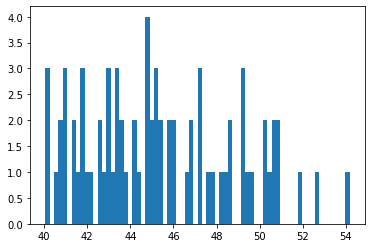

In [ ]:
plt.hist(test_overThres_failure_predict, bins=70)

(array([218.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([-1.        , -0.19131317,  0.61737366,  1.42606049,  2.23474731,
         3.04343414,  3.85212097,  4.6608078 ,  5.46949463,  6.27818146,
         7.08686829,  7.89555511,  8.70424194,  9.51292877, 10.3216156 ,
        11.13030243, 11.93898926, 12.74767609, 13.55636292, 14.36504974,
        15.17373657, 15.9824234 , 16.79111023, 17.59979706, 18.40848389,
        19.21717072, 20.02585754, 20.83454437, 21.6432312 , 22.45191803,
        23.26060486, 24.06929169, 24.87797852, 25.68666534, 26.49535217,
        27.

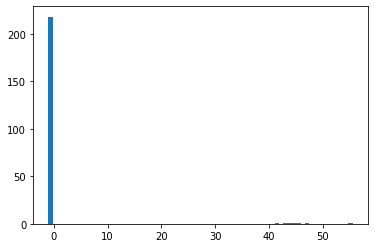

In [ ]:
plt.hist(test_overThres_normal_predict, bins=70)

(array([ 8.,  0.,  0.,  0.,  0.,  0., 51.,  0.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([10.        , 10.15714286, 10.31428571, 10.47142857, 10.62857143,
        10.78571429, 10.94285714, 11.1       , 11.25714286, 11.41428571,
        11.57142857, 11.72857143, 11.88571429, 12.04285714, 12.2       ,
        12.35714286, 12.51428571, 12.67142857, 12.82857143, 12.98571429,
        13.14285714, 13.3       , 13.45714286, 13.61428571, 13.77142857,
        13.92857143, 14.08571429, 14.24285714, 14.4       , 14.55714286,
        14.71428571, 14.87142857, 15.02857143, 15.18571429, 15.34285714,
        15.5       , 15.65714286, 15.81428571, 15.97142857, 16.12857143,
        16.28571

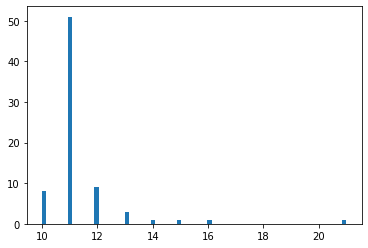

In [ ]:
plt.hist(test_overThres_failure, bins=70)

(array([218.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   3.]),
 array([-1.        , -0.81428571, -0.62857143, -0.44285714, -0.25714286,
        -0.07142857,  0.11428571,  0.3       ,  0.48571429,  0.67142857,
         0.85714286,  1.04285714,  1.22857143,  1.41428571,  1.6       ,
         1.78571429,  1.97142857,  2.15714286,  2.34285714,  2.52857143,
         2.71428571,  2.9       ,  3.08571429,  3.27142857,  3.45714286,
         3.64285714,  3.82857143,  4.01428571,  4.2       ,  4.38571429,
         4.57142857,  4.75714286,  4.94285714,  5.12857143,  5.31428571,
         5.

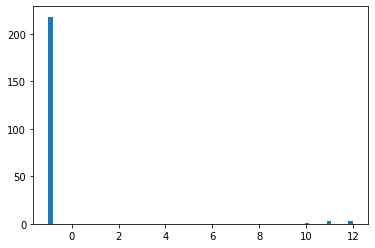

In [ ]:
plt.hist(test_overThres_normal, bins=70)

In [ ]:
testy_overThres_f1 = [-1]*300
testPredict_overThres_f1 = [-1]*300
row_num = 11

for i_cycle in range(300):
  if i_cycle in cycleLable_test_arr:
    testy_overThres_f1[i_cycle] = 0
  else:
    testy_overThres_f1[i_cycle] = 1

for i in range(len(test_overThres_failure)):
  if test_overThres_failure[i] <= row_num and test_overThres_failure[i] != -1:
    testPredict_overThres_f1[cycleLable_test_arr[i]] = 0 #0
  else:
    testPredict_overThres_f1[cycleLable_test_arr[i]] = 1 #1

for i in range(len(test_overThres_normal)):
  if test_overThres_normal[i] <= row_num and test_overThres_normal[i] != -1:
    testPredict_overThres_f1[cycleLable_test_arr_normal[i]] = 0
  else:
    testPredict_overThres_f1[cycleLable_test_arr_normal[i]] = 1
  

print("f1-score: " + str(f1_score(testy_overThres_f1, testPredict_overThres_f1, average='macro')))

cm = confusion_matrix(testy_overThres_f1, testPredict_overThres_f1)
print(cm)

f1-score: 0.9058912102390363
[[ 59  16]
 [  4 221]]


In [ ]:
testy_overThres_f1 = [-1]*300
testPredict_overThres_f1 = [-1]*300
row_num = 59

for i_cycle in range(300):
  if i_cycle in cycleLable_test_arr:
    testy_overThres_f1[i_cycle] = 0
  else:
    testy_overThres_f1[i_cycle] = 1

for i in range(len(test_overThres_failure)):
  if test_overThres_failure[i] <= row_num and test_overThres_failure[i] != -1:
    testPredict_overThres_f1[cycleLable_test_arr[i]] = 0 #0
  else:
    testPredict_overThres_f1[cycleLable_test_arr[i]] = 1 #1

for i in range(len(test_overThres_normal)):
  if test_overThres_normal[i] <= row_num and test_overThres_normal[i] != -1:
    testPredict_overThres_f1[cycleLable_test_arr_normal[i]] = 0
  else:
    testPredict_overThres_f1[cycleLable_test_arr_normal[i]] = 1
  

print("f1-score: " + str(f1_score(testy_overThres_f1, testPredict_overThres_f1, average='macro')))

cm = confusion_matrix(testy_overThres_f1, testPredict_overThres_f1)
print(cm)

f1-score: 0.9698063291685239
[[ 75   0]
 [  7 218]]
